<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Posadzy/Rekomendacje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

#*ZADANIE I*#


In [3]:
df = pd.read_csv("GroceryStoreDataSet.csv", header=None)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [4]:
transactions_list = [row.split(',') for row in df[0]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
te = TransactionEncoder()
te_ary = te.fit(transactions_list).transform(transactions_list)
te_ary

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[ True, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False,  True, False, False,  True, False, False,  True,
        False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True,  True,
        False, False],
       [ True, False, False, False, False, False, False,  True, False,
        False,  True],
       [False,  True,  True, False, False, False, False, False, False,
        False,  True],
       [False, False, False, False, False,  True, False,  True, False,
        False,  True],
       [ True, False,  True, False, False, False, False,  True, False,
        False,  True],
       [False, False,  True, False, False, False,  True,  True, False,
        False,  True],
       [False, False,  True, False, False, False, False, False,  True,
        False, False],
       [ True, False, False,  True,  True,  True, False, Fal

In [6]:
te_ary.astype("int")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]])

In [7]:
df_data = pd.DataFrame(te_ary, columns = te.columns_)
df_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [8]:
supp = apriori(df_data, min_support = 0.15, use_colnames = True).sort_values(by = 'support', ascending = False)
supp

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
9,0.35,(TEA)
5,0.30,(CORNFLAKES)
8,0.30,(SUGER)
6,0.25,(MAGGI)
7,0.25,(MILK)
15,0.20,"(MILK, BREAD)"
20,0.20,"(COFFEE, SUGER)"


In [9]:
conf = conf = association_rules(supp, metric="confidence", min_threshold=0.05).sort_values(by = 'confidence', ascending = False)
conf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882
0,(MILK),(BREAD),0.25,0.65,0.20,0.800000,1.230769,0.0375,1.750000,0.250000
10,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.250000,0.750000
19,(BOURNVITA),(BREAD),0.20,0.65,0.15,0.750000,1.153846,0.0200,1.400000,0.166667
3,(SUGER),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
4,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
8,(SUGER),(BREAD),0.30,0.65,0.20,0.666667,1.025641,0.0050,1.050000,0.035714
14,(MAGGI),(BREAD),0.25,0.65,0.15,0.600000,0.923077,-0.0125,0.875000,-0.100000
6,(TEA),(BREAD),0.35,0.65,0.20,0.571429,0.879121,-0.0275,0.816667,-0.174603
11,(TEA),(MAGGI),0.35,0.25,0.20,0.571429,2.285714,0.1125,1.750000,0.865385


In [10]:
conf1 = association_rules(supp, metric='zhangs_metric', min_threshold=0.15).sort_values(by='zhangs_metric', ascending=False)
conf1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,(COFFEE),(COCK),0.40,0.15,0.15,0.375000,2.500000,0.0900,1.360000,1.000000
7,(TEA),(MAGGI),0.35,0.25,0.20,0.571429,2.285714,0.1125,1.750000,0.865385
6,(MAGGI),(TEA),0.25,0.35,0.20,0.800000,2.285714,0.1125,3.250000,0.750000
11,(COCK),(COFFEE),0.15,0.40,0.15,1.000000,2.500000,0.0900,inf,0.705882
2,(COFFEE),(SUGER),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000,0.666667
5,(COFFEE),(CORNFLAKES),0.40,0.30,0.20,0.500000,1.666667,0.0800,1.400000,0.666667
3,(SUGER),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
4,(CORNFLAKES),(COFFEE),0.30,0.40,0.20,0.666667,1.666667,0.0800,1.800000,0.571429
1,(BREAD),(MILK),0.65,0.25,0.20,0.307692,1.230769,0.0375,1.083333,0.535714
13,(BISCUIT),(CORNFLAKES),0.35,0.30,0.15,0.428571,1.428571,0.0450,1.225000,0.461538


#*ZADANIE II*#

In [28]:
from scipy.sparse import csr_matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
ratings = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/ratings.csv")
movies = pd.read_csv("https://s3-us-west-2.amazonaws.com/recommender-tutorial/movies.csv")
ratings.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [13]:
movies.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [14]:
df = pd.merge(ratings, movies, on='movieId')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


**Liczba wszystkich ocen**

In [15]:
sum = df['rating'].count()
print ("Suma ocen ", sum)

Suma ocen  100836


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Liczba filmów w bazie**

In [16]:
m_sum = df['title'].nunique()
print ("suma filmow", m_sum)

suma filmow 9719


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Liczba użytkowników**

In [17]:
u_sum = df['userId'].nunique()
print ("suma uzytkownikow", u_sum)

suma uzytkownikow 610


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Średnia liczba ocen na użytkownika**

In [ ]:
avg_ratings = sum / u_sum
print ("srednia liczba ocen uzytkownika",avg_ratings)

**Średnia liczba ocen na film**

In [ ]:
avg_ratings_film = sum / m_sum
print ("Średnia liczba ocen na film",avg_ratings_film)

**Rozkład ocen**

In [ ]:
rating_distribution = df['rating'].value_counts().sort_index()
print("Rozkład ocen" ,rating_distribution)

**----------------------**

In [ ]:
titles_dict = dict(zip(movies['movieId'], movies['title']))
titles_dict

In [ ]:
M = df['userId'].nunique()
N = df['movieId'].nunique()
user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
user_index = [user_mapper[i] for i in df['userId']]
item_index = [movie_mapper[i] for i in df['movieId']]
X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M,N))

In [ ]:
n_total = X.shape[0]*X.shape[1]
n_ratings = X.nnz #scipy.sparse.csr_matrix.nnz no of stored values, including explicit 0
sparsity = n_ratings/n_total
sparsity_p = round(sparsity*100,2)
print(f"Matrix sparsity: {sparsity_p}%")
n_ratings_per_user = X.getnnz(axis=1)

In [ ]:
def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    X = X.T
    neighbour_ids = []
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)

    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    for i in range(0,k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    neighbour_ids.pop(0)
    return neighbour_ids


In [ ]:
similar_movies = find_similar_movies(movie_id=1,X=X,movie_mapper=movie_mapper,movie_inv_mapper=movie_inv_mapper, k=10)
similar_movies

movie_names = df.loc[df['movieId'].isin(similar_movies), 'title'].tolist()
set(movie_names)

#*Odpowiedz/ pokaż część danych*#

**Podaj liczbę filmów dla dzieci**


In [ ]:
num_movies_childrens = df[df['genres'].str.contains('Children')]['movieId'].nunique()
print(f"Number of children's movies: {num_movies_childrens}")

**Pokaż rozkład ocen filmów z 1995**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


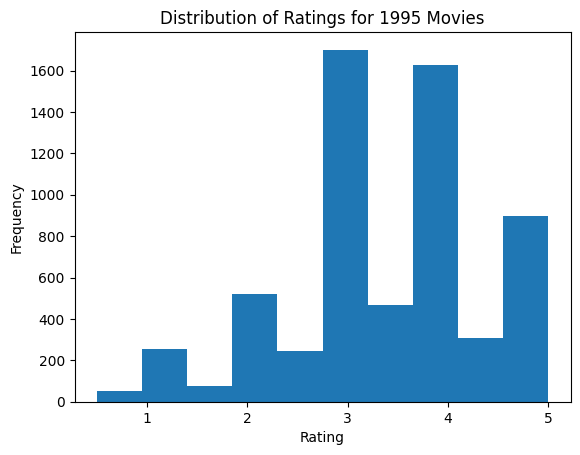

In [36]:
df['year'] = df['title'].str.extract(r'\((\d{4})\)', expand=False)
ratings_1995 = df[df['year'] == '1995']

ratings_1995['rating'].plot(kind='hist', bins=10, title='Distribution of Ratings for 1995 Movies')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Podaj średnią ocen wszystkich filmów akcji oraz 3 filmy najwyżej oceniane**

In [37]:
action_movies = df[df['genres'].str.contains('Action')]

avg_action_rating = action_movies['rating'].mean()
print(f"Average rating for action movies: {avg_action_rating}")

top_3_action_movies = action_movies.groupby('title')['rating'].mean().sort_values(ascending=False).head(3)
print("Top 3 highest-rated action movies:")
print(top_3_action_movies)

Average rating for action movies: 3.447984331646809
Top 3 highest-rated action movies:
title
Knock Off (1998)                                                      5.0
On the Other Side of the Tracks (De l'autre côté du périph) (2012)    5.0
Sonatine (Sonachine) (1993)                                           5.0
Name: rating, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




*  **Zbuduj system rekomendacyjny używając biblioteki SURPRISE**
*  **Użyj dwóch algorytmów SVD oraz kNN w wersji wylosowanej**
*  **Użyj optymalizacji parametrów metodą GRID search do wyboru liczby sąsiadów z wylosowanego przedziału**
*  **Użyj walidacji krzyżowej dla ostatecznego modelu**
*  **Porównaj oba algorytmy pod względem czasu uczenia oraz wylosowanych błędów**


In [30]:
!pip install surprise

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357248 sha256=e2170866806399ad4e72568ad775770a26dc537e6a38605becb5a6fa4860d9a3
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [31]:
from surprise import Dataset, Reader, SVD, KNNBasic
from surprise.model_selection import GridSearchCV, cross_validate

reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)

param_grid_svd = {'n_factors': [15, 30], 'n_epochs': [20, 30], 'lr_all': [0.005, 0.010]}
gs_svd = GridSearchCV(SVD, param_grid_svd, measures=['rmse', 'mae'], cv=5)
gs_svd.fit(data)

random_k = random.randint(5, 40)
print(f"Randomly selected number of neighbors: {random_k}")

param_grid_knn = {'k': [random_k], 'sim_options': {'name': ['msd', 'cosine'], 'user_based': [False]}}
gs_knn = GridSearchCV(KNNBasic, param_grid_knn, measures=['rmse', 'mae'], cv=5)
gs_knn.fit(data)

best_svd = gs_svd.best_estimator['rmse']
best_knn = gs_knn.best_estimator['rmse']

cv_svd = cross_validate(best_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cv_knn = cross_validate(best_knn, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

print("SVD results:", cv_svd)
print("kNN results:", cv_knn)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Randomly selected number of neighbors: 13
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8670  0.8706  0.8713  0.8651  0.8741  0.8696  0.0032  
MAE (test